This jupyter notebook has been created for Vis purpose, in order to evaluate and understand the prediction obtained by different models

# Packages required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.umath_tests import inner1d
import os
import sys
import tensorflow as tf

import SimpleITK as sitk


C:\Users\r778e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
def get_pred(pred_dir, pred_id, patch_size, checkpoint_num,overlap_step):
    
    """ Get the npa prediction from a specifique model. A model is defined by 3 followed metrics 

    Args:
        pred_dir: Path were the npa prediction is saved.
        pred_id: The id that you choose to perform prediction on
        patch_size: Number of patch.
        checkpoint_num: the number of the checkpoint choose for the current prediction. 
        overlap_step: Number of overlap.

    Returns:
        prediction: npa of size [Depth, Height, Width] """


    print('Perform visualization for subject-%d:' % pred_id)
       
    
    print('loading prediction...')
    
    pred_file = os.path.join(pred_dir, 'preds-%d-sub-%d-overlap-%d-patch-%d.npy' % \
                            (checkpoint_num, pred_id, overlap_step, patch_size))
    assert os.path.isfile(pred_file)
    prediction = np.load(pred_file) 
    
    print('Check pred: ', prediction.shape, np.unique(prediction))
          
    return prediction

In [18]:
pred_dir=r'C:\Users\r778e\Desktop\KnowUbone\savedir'
pred_id=5
patch_size=32
checkpoint_num=140000
overlap_step=20


prediction=get_pred(pred_dir, pred_id, patch_size, checkpoint_num,overlap_step)

Perform visualization for subject-5:
loading prediction...
Check pred:  (156, 512, 512) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 31 33 34]


In [50]:
Bones_label={0:"BACKGROUND",
1:"SKULL",
2:"MANDIBLE",
3:"SCAPULA_R",
4:"SCAPULA_L",
5:"HUMERUS_R",
6:"HUMERUS_L",
7:"CLAVICLE_R",
8:"CLAVICLE_L",
9:"STERNUM",
10:"C1",
11:"C2",
12:"C3",
13:"C4",
14:"C5",
15:"C6",
16:"C7",
17:"T1",
18:"RIB_1_R",
19:"RIB_1_L",
20:"T2",
21:"RIB_2_R",
22:"RIB_2_L",
23:"T3",
24:"RIB_3_R",
25:"RIB_3_L",
26:"T4",
27:"RIB_4_R",
28:"RIB_4_L",
29:"T5",
30:"RIB_5_R",
31:"RIB_5_L",
32:"T6",
33:"RIB_6_R",
34:"RIB_6_L",
35:"T7",
36:"RIB_7_R",
37:"RIB_7_L",
38:"HYOID"}

In [15]:
def dice_coef(pred_class,label_class):
    
    '''Purpose 
    compute the dice coefficient between the ground_truth and the prediction for a class. 
    The two arguments should be the representation of one_hot_encoding of the prediction and the ground_truth
    
    Args:
    
        pred_class [depth, height,weight,i] where i denote the i 
        ground_truth [depth, height,weight,i] where i denote the class i
    
    Returns: A coefficient between [0,1] 
    '''
    return np.sum(pred_class[label_class==1])*2.0 / (np.sum(pred_class) + np.sum(label_class))

In [ ]:
def one_hot(cube):
    '''Purpose
    Create one-hot-encoding representation of a cube [depth,height,weight] 
    Args:
        cube: npa [depth,height,weight]
    
    Returns:
    
        The one hot representation of the cube [Depth,Height,Width,Number_of_classes].
        
        Basicaly this function will create x 3D cube,where x is equal to the Number_of_classes
    ''' 
    num_class = np.max(cube) + 1
    return np.eye(num_class)[cube]


In [ ]:
def compute_dice_all_classes(prediction,ground_truth):
      
    one_hot_pred=one_hot(prediction)
    one_hot_grd_truth=one_hot(ground_truth)
    
    for i in range (0,np.max(prediction)):
        
        class_x_lbl=one_hot_lbl[:,:,:,i]
        class_x_pred=one_hot_pred[:,:,:,i]
        
        a=dice_coef(class_x_pred,class_x_lbl)
        
        print('dice coefficient for bones class {} :'.format(Bones_label[i], a))
    

In [307]:
def visualize_slice_prediction_vs_groundtruth(prediction,groundtruth,z):
    

    
    number_of_classes=38
    
    
    unique_prediction, counts_prediction = np.unique(prediction[z], return_counts=True)
    unique_ground_truth, counts_ground_truth = np.unique(groundtruth[z], return_counts=True)
    list_bones_ground_truth=[Bones_label[key] for key in unique_ground_truth]
    list_bones_prediction=[Bones_label[key] for key in unique_prediction]
    

    for i,key in enumerate(unique_prediction):
        
        print("---------","For the classe",Bones_label[key],(counts_prediction[i]/np.sum(counts_prediction)*100),"% is present over the prediction slice" ,"--------")  
        print("")
    
    for k,keys in enumerate(unique_ground_truth):

        print("---------","For the classe",Bones_label[keys],(counts_ground_truth[k]/np.sum(counts_ground_truth)*100),"% is present over the ground_truth slice" ,"--------")    
        print("")



    
    fig,axes = plt.subplots(1,2,figsize=(40,20),constrained_layout=True)
    
    fig.suptitle('Visualisation of the comparaison between prediction and groundtruth on slice {} '.format(z),fontsize=35,color='c')
    
    [Bones_label[key] for key in array]
    [Bones_label[key] for key in array]
    axes[0].set_title('View of the prediction slice {}\nClasses present:\n{}={}'.format(z,list_bones_prediction,unique_prediction),loc="left",fontsize=20)
    axes[1].set_title('View of the groundtruth slice {}\nClasses present:\n{}={}'.format(z,list_bones_ground_truth,unique_ground_truth),loc="left",fontsize=20)
    
    fig.colorbar(axes[0].imshow(prediction[z]),ax=axes[0],ticks=range(0,number_of_classes+1),shrink=0.9,orientation='horizontal')
    fig.colorbar(axes[1].imshow(groundtruth[z]),ax=axes[1],ticks=range(0,number_of_classes+1),shrink=0.9,orientation='horizontal')
    


    

--------- For the classe BACKGROUND 99.83291625976562 % is present over the prediction slice --------

--------- For the classe SKULL 0.1232147216796875 % is present over the prediction slice --------

--------- For the classe MANDIBLE 0.0385284423828125 % is present over the prediction slice --------

--------- For the classe CLAVICLE_L 0.0003814697265625 % is present over the prediction slice --------

--------- For the classe C4 0.0003814697265625 % is present over the prediction slice --------

--------- For the classe C5 0.00152587890625 % is present over the prediction slice --------

--------- For the classe C7 0.0030517578125 % is present over the prediction slice --------

--------- For the classe BACKGROUND 99.38201904296875 % is present over the ground_truth slice --------

--------- For the classe MANDIBLE 0.35247802734375 % is present over the ground_truth slice --------

--------- For the classe C2 0.125885009765625 % is present over the ground_truth slice --------

-----

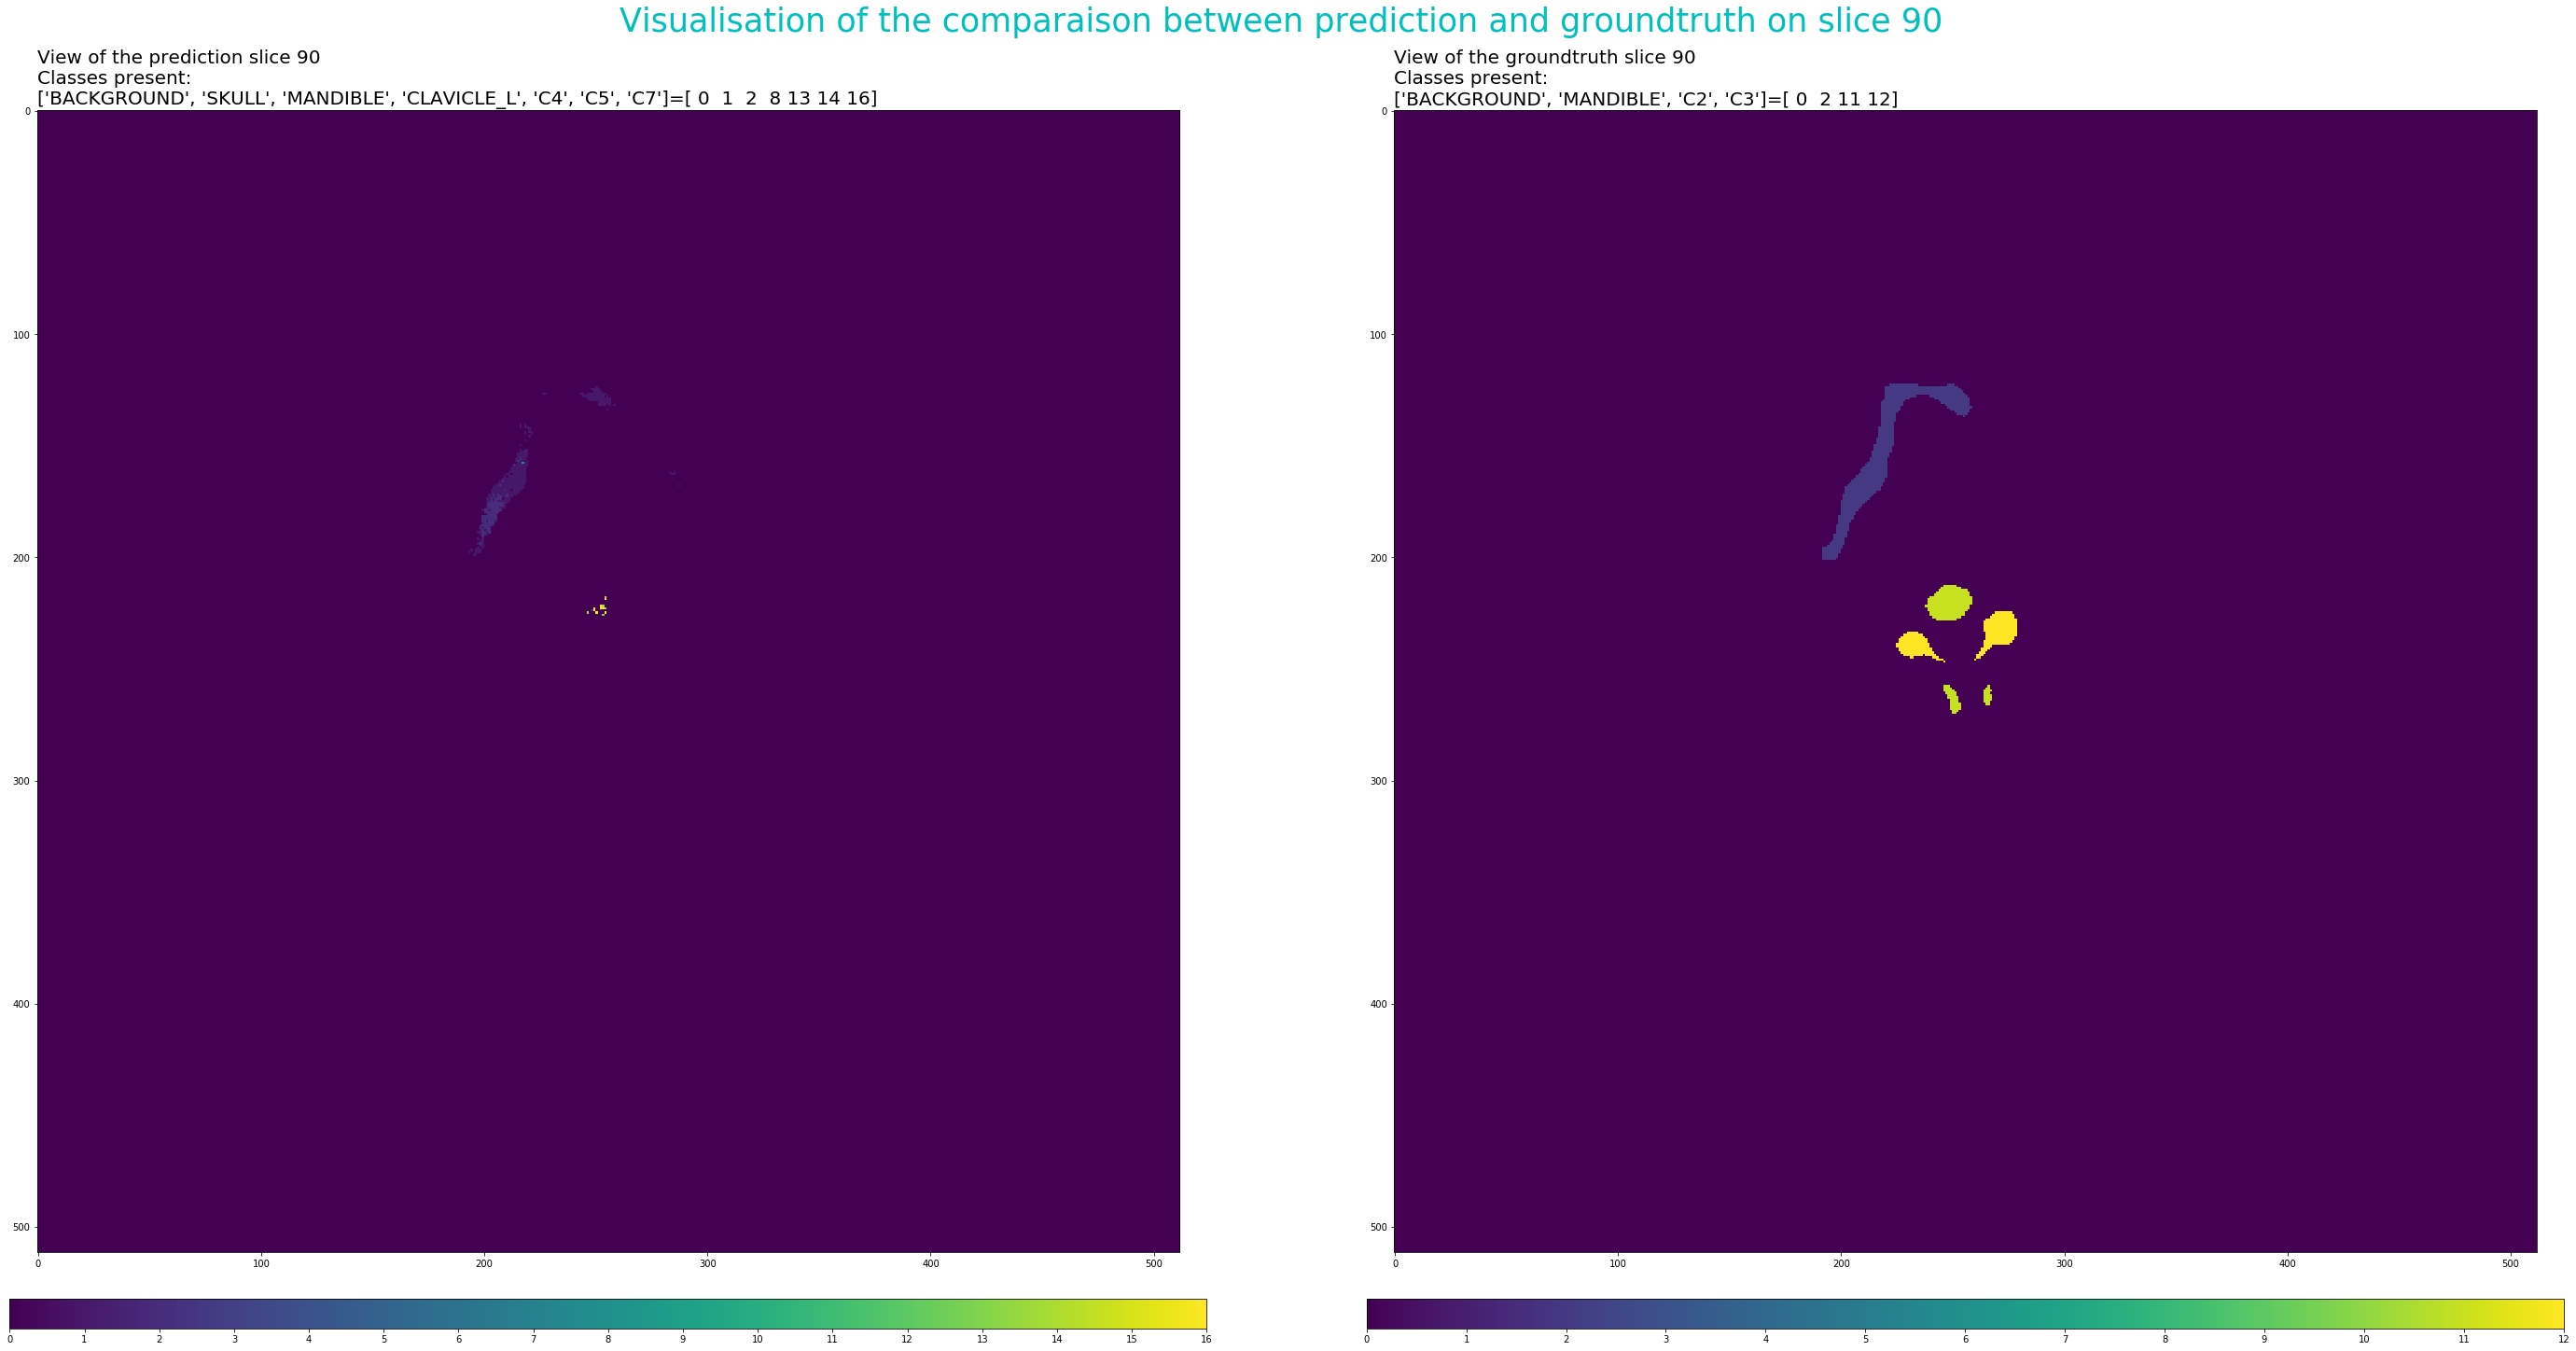

In [308]:
visualize_slice_prediction_vs_groundtruth(prediction,ground_truth,z=90)

In [76]:
filename=r"D:\data_set_no_augmentation\HeadAndNeck_anonymous-5-label.mha"



ct_label = sitk.ReadImage(filename)
ground_truth = sitk.GetArrayFromImage(ct_label)


In [74]:
unique_ground_truth, counts_ground_truth = np.unique(ground_truth[5], return_counts=True)

In [75]:
unique_ground_truth

array([-1024, -1023, -1022, ...,  1464,  1467,  1488], dtype=int16)

In [ ]:
filename=r"C:\Users\r778e\Desktop\KnowUbone\savedir"

In [5]:

def convert_to_mha(prediction,id_patient,output_dir):
    npa_res=prediction.astype('int16')
    res_img = sitk.GetImageFromArray(npa_res)
    
    
    filename_ground_truth=r"D:\data_set_no_augmentation\HeadAndNeck_anonymous-%i.mha" %id_patient
    ground_truth = sitk.ReadImage(filename_ground_truth)
    
    res_img.CopyInformation(ground_truth)
    sitk.WriteImage(res_img,os.path.join(output_dir,"prediction_from_patient_%i.mha"%id_patient))



In [20]:
def convert_to_mha_different_shape(prediction,id_patient,output_dir):
    
    npa_res=prediction.astype('int16')
    res_img = sitk.GetImageFromArray(npa_res)
    
    npa_zeros=np.zeros([512,512],'int16')
    npa_zeros=npa_zeros[np.newaxis,:,:]
    
    filename_ground_truth=r"D:\data_set_no_augmentation\HeadAndNeck_anonymous-%i.mha" %id_patient
    ground_truth = sitk.ReadImage(filename_ground_truth)
    
    if len(res_img) == ground_truth.GetDepth():
        res_img.CopyInformation(ground_truth)
        sitk.WriteImage(res_img,os.path.join(output_dir,"prediction_from_patient_%i.mha"%id_patient))
    
    else:
        npa_res=np.concatenate((npa_res,npa_zeros),axis=0)
        res_img = sitk.GetImageFromArray(npa_res)
        res_img.CopyInformation(ground_truth)
        sitk.WriteImage(res_img,os.path.join(output_dir,"prediction_from_patient_%i.mha"%id_patient))
    

In [21]:
id_patient=5
output_dir=r"C:\Users\r778e\Desktop\Tutorial"
convert_to_mha_different_shape(prediction,id_patient,output_dir)